# The North Face e-commerce

Boosting online sales !

## Import useful librairies

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Preprocessing of textual data

In [2]:
# Download the english language to understand this document
!python -m spacy download en_core_web_sm -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 63.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [3]:
# Data manipulation
import pandas as pd
import numpy as np
import spacy

# Preprocessing
import en_core_web_sm
import html
import re
from spacy.lang.en.stop_words import STOP_WORDS

# Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

# Clustering
from sklearn.cluster import DBSCAN

# Linear dimensionality reduction
from sklearn.decomposition import TruncatedSVD

# Visualization
import matplotlib.pyplot as plt
import wordcloud

### Loading data

In [4]:
from operator import index
# Load data
data = pd.read_csv("/content/drive/MyDrive/src/sample-data.csv")

# Basics informations about data
print(f"Shape of data : {data.shape}")
print()

# Show the first row of data
display(data.head(1))

Shape of data : (500, 2)



,id,description
0,1,Active classic boxers - There's a reason why o...


### Data preprocessing

ℹ️ First, you'll have to make some preprocessings to clean the corpus (in particular, don't forget to handle stop words and to lemmatize the documents). For this step, you'll need pandas and spacy.


In [5]:
# Load the pretrained NLP model for Spacy library
nlp = en_core_web_sm.load()

In [6]:
# Show the first line of column 'description'
data['description'][0]

'Active classic boxers - There\'s a reason why our boxers are a cult favorite - they keep their cool, especially in sticky situations. The quick-drying, lightweight underwear takes up minimal space in a travel pack. An exposed, brushed waistband offers next-to-skin softness, five-panel construction with a traditional boxer back for a classic fit, and a functional fly. Made of 3.7-oz 100% recycled polyester with moisture-wicking performance. Inseam (size M) is 4 1/2". Recyclable through the Common Threads Recycling Program.<br><br><b>Details:</b><ul> <li>"Silky Capilene 1 fabric is ultralight, breathable and quick-to-dry"</li> <li>"Exposed, brushed elastic waistband for comfort"</li> <li>5-panel construction with traditional boxer back</li> <li>"Inseam (size M) is 4 1/2"""</li></ul><br><br><b>Fabric: </b>3.7-oz 100% all-recycled polyester with Gladiodor natural odor control for the garment. Recyclable through the Common Threads Recycling Program<br><br><b>Weight: </b>99 g (3.5 oz)<br><b

In [12]:
# Clean and tokenized function

def clean_and_tokenize(text):

  # Delete all HTML tags
  text = re.sub(r"<[^>]+>", "", text)

  # Lowercase text
  text = text.lower()

  # Keep only alphabetical words
    # Delete numbers and other special characters
    # Replace by a single space
  text = " ".join(re.findall(r"\b[a-zA-Z]+\b", text))

  # Tokenized with the nlp model
  tokens = nlp(text)

  # Lemmatization and removal of stop-words
  tokens = [token.lemma_ for token in tokens if token.lemma_ not in STOP_WORDS and token.is_alpha]

  # Return tokens as text (detokenization)
  return " ".join(tokens)

In [13]:
# Apply the full function to the 'description' column of the DataFrame
data['nlp_ready'] = data['description'].apply(clean_and_tokenize)
display(data.head())

,id,description,nlp_ready
0,1,Active classic boxers - There's a reason why o...,active classic boxer s reason boxer cult favor...
1,2,Active sport boxer briefs - Skinning up Glory ...,active sport boxer brief skin glory require mo...
2,3,Active sport briefs - These superbreathable no...,active sport brief superbreathable fly brief m...
3,4,"Alpine guide pants - Skin in, climb ice, switc...",alpine guide pant skin climb ice switch rock t...
4,5,"Alpine wind jkt - On high ridges, steep ice an...",alpine wind jkt high ridge steep ice alpine ja...


In [14]:
# Show the firs line of the column 'nlp_ready'
data['nlp_ready'][0]

'active classic boxer s reason boxer cult favorite cool especially sticky situation quick dry lightweight underwear minimal space travel pack expose brush waistband offer skin softness panel construction traditional boxer classic fit functional fly oz recycle polyester moisture wicke performance inseam size m recyclable common thread recycle program detail silky capilene fabric ultralight breathable quick dry expose brush elastic waistband comfort panel construction traditional boxer inseam size m fabric oz recycle polyester gladiodor natural odor control garment recyclable common thread recycle programweight g oz mexico'

### TF-IDF Transformation

ℹ️ Then, you can to encode the texts with **TF-IDF transformation** (this can be done with scikit learn's `TFIDFVectorizer`)

In [15]:
# Use sklearn to calculate the tf-idf
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['nlp_ready'])

# X is a generator, we can transform as an array
X = X.toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
# X is a sparce matrix
# We can count word occurenceswords = vectorizer.get_feature_names_out()
word_counts = np.asarray(X.sum(axis=0)).flatten()  # Keep it sparse
word_freq = dict(zip(words, word_counts))
print(word_freq)

{'abandon': 0.15809586134161432, 'ability': 0.3175028893811157, 'able': 0.14898095813670692, 'abrasion': 2.9303829112881075, 'abrasive': 0.11945093734582667, 'abroad': 0.16454003076666449, 'absolute': 0.17694280953696512, 'absorb': 0.23916237941178625, 'absorption': 0.19637438105855787, 'abstract': 0.18265618661588168, 'abuse': 0.888859300780291, 'abusive': 0.37891899257236633, 'accentuate': 0.1458123651011102, 'access': 3.6528194075362226, 'accessibility': 0.15314292938773913, 'accessory': 0.7371844529524425, 'accommodate': 2.065093936678967, 'accomplish': 0.2713236557269039, 'accord': 0.4040119941057906, 'ace': 0.16801762612291501, 'achieve': 0.13693154733246082, 'achille': 0.13158320574537716, 'act': 0.2955733496353766, 'action': 0.9726313218047218, 'active': 2.8534671812344654, 'activity': 1.6803634395124656, 'acutely': 0.19195818420444785, 'adapt': 0.2222525711774643, 'adaptability': 0.3466907602797744, 'adaptable': 0.471242654805772, 'add': 5.5940475799209874, 'addition': 0.19908

In [21]:
# Get tokens for all documents
# This attribute is a Python dictionnary that maps each term (single word)
# in the corpus to an integer, representing its index in the vocabulary
vectorizer.vocabulary_

{'active': 24,
 'classic': 520,
 'boxer': 339,
 'reason': 2443,
 'cult': 740,
 'favorite': 1117,
 'cool': 663,
 'especially': 1043,
 'sticky': 2969,
 'situation': 2791,
 'quick': 2403,
 'dry': 926,
 'lightweight': 1758,
 'underwear': 3359,
 'minimal': 1933,
 'space': 2892,
 'travel': 3276,
 'pack': 2146,
 'expose': 1076,
 'brush': 370,
 'waistband': 3476,
 'offer': 2084,
 'skin': 2802,
 'softness': 2872,
 'panel': 2166,
 'construction': 639,
 'traditional': 3260,
 'fit': 1165,
 'functional': 1272,
 'fly': 1210,
 'oz': 2143,
 'recycle': 2452,
 'polyester': 2295,
 'moisture': 1959,
 'wicke': 3556,
 'performance': 2221,
 'inseam': 1584,
 'size': 2792,
 'recyclable': 2451,
 'common': 595,
 'thread': 3194,
 'program': 2352,
 'silky': 2770,
 'capilene': 428,
 'fabric': 1093,
 'ultralight': 3339,
 'breathable': 348,
 'elastic': 975,
 'comfort': 585,
 'gladiodor': 1315,
 'natural': 2008,
 'odor': 2083,
 'control': 653,
 'garment': 1287,
 'programweight': 2354,
 'mexico': 1903,
 'sport': 2917,


## 👉 Part 1 : Groups of products with similar descriptions

### DBScan

ℹ️ For this part, you'll have to train a clustering model that will create groups of products for which the descriptions are "close" to each other.

In [24]:
# We need to store X in a DataFrame to analyse columns with DBScan
# Easy for interpretation, compatibility with other analysis, visualization and filtering
data_X = pd.DataFrame(
    X,
    columns = vectorizer.get_feature_names_out(),
    index = [f"desciption_{x}" for x in range(X.shape[0])]
)
data_X.head()

,abandon,ability,able,abrasion,abrasive,abroad,absolute,absorb,absorption,abstract,...,zest,zinger,zip,zipped,zipper,zippered,zippersfabric,zipping,zips,zone
desciption_0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0
desciption_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0
desciption_2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0
desciption_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.210332,0.11174,0.0,0.0,0.0,0.0
desciption_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.152191,0.00000,0.0,0.0,0.0,0.0


ℹ️ You have to find some values for eps and min_samples that allow to get 10-20 clusters and not too many outliers.

ℹ️ When dealing with texts, the distance metric to be used is "cosine" instead of "euclidean".

In [44]:
# Let's try several eps values beacause ajusting eps is usually
# the most effective to control the number of clusters
# while min_samples allows to refine the density required for each cluster.

# Testing several combinations of these parameters will help us
# find the configuration that prodeces the desired number of cluster

# Initialize the best values
best_eps = None
best_min_samples = None
best_n_clusters = None
best_n_outliers = float('inf') # It acts as an unbounded upper value for comparison. This is useful for finding lowest values for something.

# Loop for
for min_samples in [3, 5, 7]:
  for eps_value in np.arange(0.01, 1, 0.02) :
    clustering = DBSCAN(eps=eps_value, min_samples=min_samples, metric='cosine', algorithm='brute')
    clustering.fit(X)

    # Count the number of clusters excluding outliers
    n_clusters = len(set(clustering.labels_)) - (1 if -1 in clustering.labels_ else 0)

    # Count the number of outliers
    n_outliers = sum(clustering.labels_== -1)


    if 10 <= n_clusters <= 20:
      print(f"For eps={eps_value}, min_samples={min_samples}, number of clusters: {n_clusters}, number of outliers: {n_outliers}")

      # Updated best settings if outliers are reduced
      if best_eps is None or n_outliers < best_n_outliers:
          best_eps = eps_value
          best_min_samples = min_samples
          best_n_clusters = n_clusters
          best_n_outliers = n_outliers

# Checking if a good set of parameters has been found
if best_eps is not None:
    print(f"\nThe optimal parameters are: 💖 eps={best_eps}, min_samples={best_min_samples} with {best_n_clusters} clusters and {best_n_outliers} outliers.")
else:
    print("No optimal parameters found in the given range.")

For eps=0.08999999999999998, min_samples=3, number of clusters: 11, number of outliers: 465
For eps=0.10999999999999997, min_samples=3, number of clusters: 10, number of outliers: 465
For eps=0.12999999999999998, min_samples=3, number of clusters: 10, number of outliers: 465
For eps=0.15, min_samples=3, number of clusters: 10, number of outliers: 465
For eps=0.16999999999999998, min_samples=3, number of clusters: 10, number of outliers: 465
For eps=0.18999999999999997, min_samples=3, number of clusters: 11, number of outliers: 453
For eps=0.20999999999999996, min_samples=3, number of clusters: 10, number of outliers: 452
For eps=0.22999999999999998, min_samples=3, number of clusters: 12, number of outliers: 445
For eps=0.24999999999999997, min_samples=3, number of clusters: 13, number of outliers: 439
For eps=0.26999999999999996, min_samples=3, number of clusters: 15, number of outliers: 428
For eps=0.29, min_samples=3, number of clusters: 17, number of outliers: 418
For eps=0.30999999

ℹ️ You can use DBSCAN to make some clustering on the TF-IDF matrix.

ℹ️ When dealing with texts, the distance metric to be used is "cosine" instead of "euclidean".

In [45]:
# Now, we have best settings fo run DBScan

# For more understanding here is the Workflow of the Code
  # Creating the TF-IDF matrix (X) : Transforms the text into numeric values.
  # Clustering with DBSCAN.fit(X) : Finds groups of similar documents.
  # Adding the results to data_X : We associate the cluster labels with data_X, so that the analysis is easier.
# So, X is used for clustering, and data_X is used for analysis and visualization of the results.

# Initialization of the DBScan clustering model on X
  # eps = 0.7099999999999999, maximum distance to consider two points as neighboors
  # min_samples=3, minimum number of points needed to form a cluster
  # metric="cosine", measure of similarity between documents, here the cosine similarity
  # algorithm="brute", method used to calculate distances, suitable for TF-IDF type data

cluster = DBSCAN(eps=0.7099999999999999, min_samples=3, metric="cosine", algorithm="brute")

# # Fitting the DBSCAN model to the X data (vectorized documents)
# Here, the data does not need to be normalized, because it is already in the appropriate scale thanks to the TF-IDF
cluster.fit(X)

# cluster.labels_ contains the cluster label of each document (or -1 for outliers)
display(cluster.labels_)
print()
# Assigning cluster labels to documents
# Associate each original document with its respective cluster, thus facilitating analysis
data['cluster_id'] = cluster.labels_
display(data.head())
print()

# We add these cluster labels as a new column 'cluster_id' in the DataFrame data_X
# This allows to have a link between the clusters and the vectorized features
# of the documents, useful for analyzing clusters based on specific words or features.
data_X['cluster_id'] = cluster.labels_
display(data_X.head())

array([ 0,  0,  0,  1,  1,  1,  2,  3,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        0,  0,  0,  0,  0,  0,  0,  0,  4,  1,  1,  1,  1,  2,  1,  1,  1,
        1,  4,  1,  1,  1,  5,  4,  2,  1,  1,  1,  1,  1,  6,  7,  7,  1,
        1,  2,  2,  2,  4, -1,  4,  1,  0,  0,  1,  4,  4,  4,  1,  1,  4,
        6,  1,  4,  4,  4,  1,  0,  5,  0, 13,  8,  8,  8,  0,  2,  2,  1,
        1,  8,  8,  8,  8,  1,  1,  2,  2,  4,  1,  1,  4,  9,  1, -1,  4,
        4,  2,  0,  0,  1,  1,  1,  1, -1, -1, 10, 10,  1,  4,  0,  1,  1,
        1,  1, -1, -1,  4,  5,  5,  1,  1,  1, -1,  2,  1,  2,  7,  1, 10,
        9,  4,  4, -1,  1,  9,  1,  4, -1,  1,  1,  8,  1, 11,  4,  4, 11,
       11,  0, 14,  1, -1,  1,  1,  1,  1,  1,  1, 12,  1,  4,  1,  4,  4,
        0,  0,  0,  0,  0,  0,  4,  4,  1,  1, -1, -1,  1,  1,  4,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  0,  0,  1,  1,  1,  8,  8,  8,  8,  1,
        1,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1, 13,  3,  3, 14,
       14,  1,  1, 13,  0

,id,description,nlp_ready,cluster_id
0,1,Active classic boxers - There's a reason why o...,active classic boxer s reason boxer cult favor...,0
1,2,Active sport boxer briefs - Skinning up Glory ...,active sport boxer brief skin glory require mo...,0
2,3,Active sport briefs - These superbreathable no...,active sport brief superbreathable fly brief m...,0
3,4,"Alpine guide pants - Skin in, climb ice, switc...",alpine guide pant skin climb ice switch rock t...,1
4,5,"Alpine wind jkt - On high ridges, steep ice an...",alpine wind jkt high ridge steep ice alpine ja...,1


,abandon,ability,able,abrasion,abrasive,abroad,absolute,absorb,absorption,abstract,...,zinger,zip,zipped,zipper,zippered,zippersfabric,zipping,zips,zone,cluster_id
desciption_0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0
desciption_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0
desciption_2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0
desciption_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.210332,0.11174,0.0,0.0,0.0,0.0,1
desciption_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.152191,0.00000,0.0,0.0,0.0,0.0,1


In [47]:
# For checking

# Total number of clusters including outliers : we are waiting here 16
n_clusters_including_outliers = len(set(cluster.labels_))
print(f"Total number of clusters including outliers : {n_clusters_including_outliers}")

# Number of documents in each cluster (-1 for outliers) : we are waiting here for outliers 26
data['cluster_id'].value_counts()

Total number of clusters including outliers : 16


,count
cluster_id,
1,226
0,72
4,60
2,29
-1,26
8,24
14,13
3,9
6,8


### Analysis of the 5 most frequent clusters:
Display of descriptions and keywords

**Objectives**
* Understand the content of clusters by reading concrete examples.
* Identify the dominant themes through the most representative words.
* Check the relevance of clustering:
    * If the descriptions of a cluster are similar, clustering is effective.
    * If they are inconsistent, DBSCAN parameters may need to be adjusted.

In [88]:
# Select all columns of data_X without the 'cluster_id' columns
cols = [col for col in data_X.columns if col != 'cluster_id']

# Loop over the 5 most frequent clusters excluding outliers (cluster -1)
for cluster in (
    data['cluster_id']
    .value_counts()               # Count the number of document in each cluster
    .loc[lambda x: x.index != -1] # Exculde the outlier cluster (-1)
    .index[:5]                    # Select the index of the 5 most frequent clusters
  ) :

  # Show the cluster
  print("CLUSTER ", cluster, " :")
  print("----")

  # Filter the DataFrame 'data' to keep only documents from the current cluster
  # Select a random sample of 2 documents from the cluster
  # Extract only the 'nlp_ready' column to display the text content of documents
  for description in data.loc[data['cluster_id'] == cluster].sample(2)['nlp_ready'] :
    print(description)
    print()
  print("----------------")

  # Calculate and display the 5 most representative words of the cluster
  # Filter 'data_X' to keep only the document with the current cluster
  # Calculate the average of the values of the characteristics (weight of the words for each word in the cluster)
  # Sort the words in the order of decreasing frequency and display the 5 first words
  print(
      data_X
      .loc[data_X['cluster_id'] == cluster, cols]
      .mean(axis=0)
      .sort_values(ascending=False)[:5]
  )
  print("--------------------------------")

CLUSTER  1  :
----
gi ii short base camp favorite gi ii s featherlight weight motion friendly crotch gusset invite day hike bouldere session dip creek soft tough nylon twill provide upf sun protection dry fast pack small road elastic waist separate low profile buckle button zip fly self drain pocket rear zip pocket beer bottle size zippered drop thigh pocket inseam length size m detail update fit tough quick dry nylon fabric elasticize waist fix web belt separate buckle button zip fly self drain pocket rear zip pocket beer bottle size zippered thigh pocket hook loop closure gussete crotch inseam fabric oz supplex nylon twill upf sun protection recyclable common thread recycle programweight g oz colombia

rain shadow pant light afterthought downpour rain shadow pant provide fully seam seal waterproof breathable protection packable lightweight tear resistant layer nylon waterproof breathable barrier deluge dwr durable water repellent finish inside raise pattern diffuse channel moisture a

💡 **General observations**

1- The clusters are well differentiated
* The text descriptions have distinct themes.
* The representative words are consistent with the products described.

2- The keywords reveal specific themes
* Cluster 1: technical clothing with "pocket", "recycle", "organic".
* Cluster 0: sportswear with "sun", "polyester", "upf".
* Cluster 4: t-shirts and textiles with "shirt", "ringspun", "print".
* Cluster 2: bags and accessories with "pocket", "strap", "mesh".
* Cluster 8: technical textiles with "merino", "wool", "odor".

3- The presence of the word "recycle" is recurrent
* The ecological aspect seems to be an important theme in several clusters.

### Wordcloud

ℹ️ You can display a wordcloud for each cluster to analyze the results and see if the groups contain different words.

CLUSTER  1  :
----


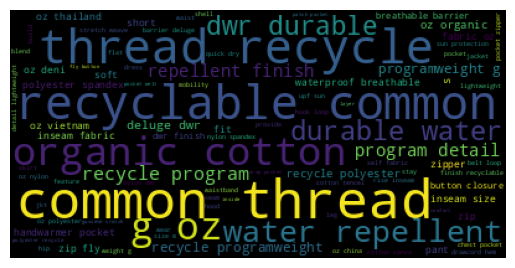

--------------------------------
CLUSTER  0  :
----


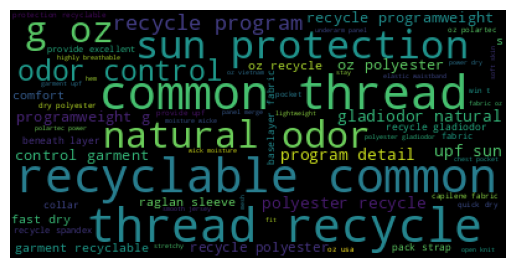

--------------------------------
CLUSTER  4  :
----


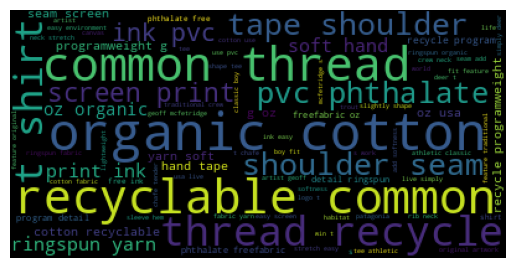

--------------------------------
CLUSTER  2  :
----


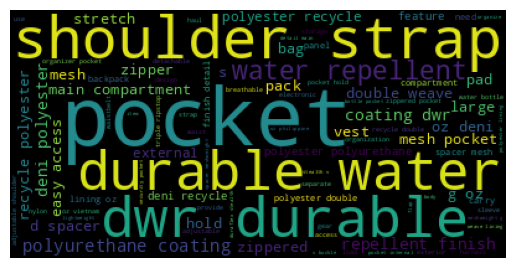

--------------------------------
CLUSTER  8  :
----


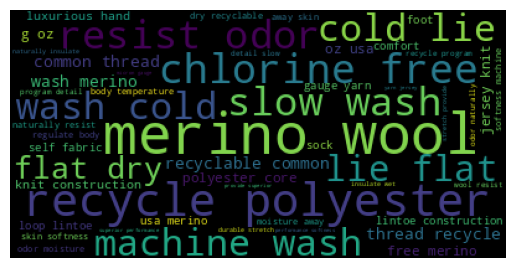

--------------------------------


In [49]:
# Wordcloud for the 5 first clusters
wd = wordcloud.WordCloud()

# Loop over the 5 most frequent clusters excluding outliers (cluster -1)
for cluster in (
    data['cluster_id']
    .value_counts()               # Count the number of document in each cluster
    .loc[lambda x: x.index != -1] # Exculde the outlier cluster (-1)
    .index[:5]                    # Select the index of the 5 most frequent clusters
  ) :

  # Show the cluster
  print("CLUSTER ", cluster, " :")
  print("----")

  # Gather all texts in the current cluster into a single string
  # Each document is separated by a space so that WordCloud can process the words
  texts = " ".join(data.loc[data['cluster_id'] == cluster, 'nlp_ready'])

  # Generate the word cloud from texts in cluster
  cloud = wd.generate(texts)

  # Show the word cloud
  plt.imshow(cloud)
  plt.axis('off')
  plt.show()
  print("--------------------------------")

## 👉 Part 2 - Recommender system

ℹ️ Then, you can use the cluster ids from part 1 to build a recommender system.

ℹ️ To do this, we will consider that products belonging to the same cluster are similar.

✅ The aim is to be able to suggest to a user some products that are similar to the ones he is interested in.

### Create function 'find_similar_items(item_id)'

Create a function named find_similar_items that takes an argument item_id representing the id of a product,

And that returns a list of 5 item ids that belong to the same cluster as the product passed in argument

In [50]:
data.head()

,id,description,nlp_ready,cluster_id
0,1,Active classic boxers - There's a reason why o...,active classic boxer s reason boxer cult favor...,0
1,2,Active sport boxer briefs - Skinning up Glory ...,active sport boxer brief skin glory require mo...,0
2,3,Active sport briefs - These superbreathable no...,active sport brief superbreathable fly brief m...,0
3,4,"Alpine guide pants - Skin in, climb ice, switc...",alpine guide pant skin climb ice switch rock t...,1
4,5,"Alpine wind jkt - On high ridges, steep ice an...",alpine wind jkt high ridge steep ice alpine ja...,1


In [51]:
# Function to find similar products based on the cluster a product belongs to
def find_similar_items(item_id):

    # Find the cluster of the given article (we make sure to retrieve the first value)
    cluster_id = data.loc[data['id'] == item_id, 'cluster_id'].values[0]

    # Select 5 similar articles in the same cluster (we take 5 random samples)
    similar_items = data.loc[data['cluster_id'] == cluster_id, :].sample(5)

    # Extract unique identifiers from similar articles
    similar_item_ids = similar_items['id'].unique()

    # Return IDs of similar items
    return similar_item_ids

### User need to choose a product

Use python's `input()` function to allow the user to choose a product \
Perform some suggestions of similar items

In [66]:
# Ask user to enter a product ID
product_id = int(input("What product would you like to buy ? "))  # Make sure the ID is an integer
print()

# Check if ID exists in DataFrame 'data'
if product_id in data['id'].values.astype(int):  # confirmation int for comparison

    # Retrieve product description
    description = data.loc[data['id'] == product_id, 'description']

    if description.empty:
        print("Description not available for this product.")
    else:
        description = description.values[0]  # If the description exists, we extract it

        print("Product found in our catalog, below is the description :")
        print(description)
        print()

        print("You might also be interested by these products... : ")
        print()

        # Find and view similar products
        for i in find_similar_items(product_id):
            print("Product #", i)

            # Retrieve and display the description of each similar product
            description = data.loc[data['id'] == i, 'description']

            if not description.empty:
                print(description.values[0])  # If the description exists, it is displayed
            else:
                print("Description not available for this product.")

            print('--------------------')
else:
    print('Product not found. Please enter a valid product id.')

What product would you like to buy ? 5

Product found in our catalog, below is the description :
Alpine wind jkt - On high ridges, steep ice and anything alpine, this jacket serves as a true "best of all worlds" staple. It excels as a stand-alone shell for blustery rock climbs, cool-weather trail runs and high-output ski tours. And then, when conditions have you ice and alpine climbing, it functions as a lightly insulated windshirt on the approach, as well as a frictionless midlayer when it's time to bundle up and tie-in. The polyester ripstop shell with a Deluge DWR (durable water repellent) treatment sheds snow and blocks wind, while the smooth, lightly brushed hanging mesh liner wicks moisture, dries fast, and doesn't bind to your baselayers. Superlight stretch-woven underarm panels enhance breathability and allow for unimpaired arm motion, and the two hand pockets close with zippers. A drawcord hem, elastic cuffs, a heat-transfer reflective logo and a regular-coil, center-front zip

## 👉 Part 3 : Topic modeling

✅ The aim is to use an LSA model to automatically extract latent topics in the products' descriptions.

### TruncatedSVD

ℹ️ You can try values for n_components that allow to get 10-20 topics.

In [64]:
print("Shape of X :", X.shape)

Shape of X : (500, 3627)


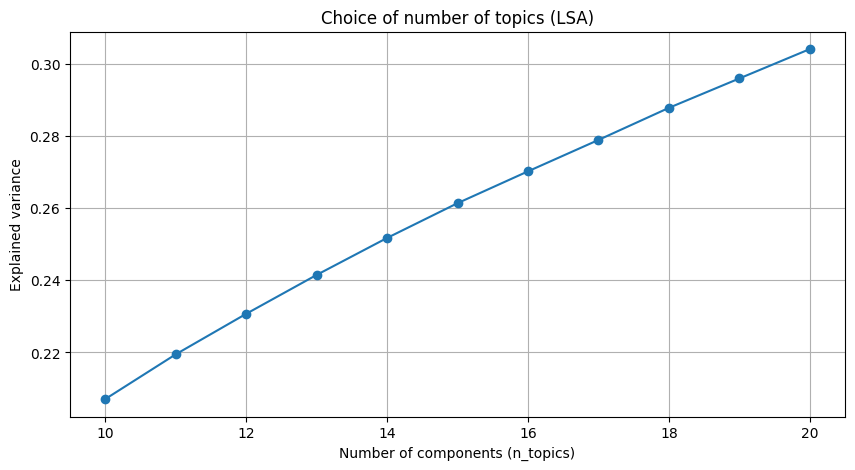

The best n_components is : 20


In [67]:
# List of values of n_components to test
n_components_list = list(range(10,21))

# Initialize explained variance
explained_variance = []

for n in n_components_list :
  svd_model = TruncatedSVD(n_components=n)

  # Training only
  svd_model.fit(X)

  # Store the explained variance
  explained_variance.append(svd_model.explained_variance_ratio_.sum())

# Display results as a graph
plt.figure(figsize=(10, 5))
plt.plot(n_components_list, explained_variance, marker='o', linestyle='-')
plt.xlabel("Number of components (n_topics)")
plt.ylabel("Explained variance")
plt.title("Choice of number of topics (LSA)")
plt.grid(True)
plt.show()

best_n_components = n_components_list[explained_variance.index(max(explained_variance))]
print(f"The best n_components is : {best_n_components}")

**The goal of maximizing explained variance with the LSA** algorithm corresponds to the goal of automatically extracting latent topics in product descriptions.

**As a reminder:**
1. LSA (Latent Semantic Analysis) is a technique that allows reducing the dimensionality of the TF-IDF matrix while preserving important relationships between terms and documents.
The goal is to identify latent themes or topics that group related terms.
2. By applying SVD to the TF-IDF matrix, LSA transforms the document/term space into a principal component space, which allows capturing the underlying structures of textual data (the hidden semantic relationships, or latent "topics").
3. Maximizing explained variance is an approach to determine how many components (n_components) should be kept so that the results of the LSA model are sufficiently explanatory while reducing noise. The variance explained by the different components is a measure of the quality of the extraction of latent topics.

✅ The objective of maximizing the variance explained allows to find an optimal number of latent topics in product descriptions.

✅ This gives an indication of the number of relevant dimensions or "themes" to keep, which allows you to efficiently extract these latent topics without adding too much noise (useless dimensions).

**In conclusion**,

This approach fits well with the objective of automatically extracting latent topics in product descriptions.
Maximizing the variance explained by the LSA model allows you to choose the best number of latent topics to keep, and thus better understand the structure of textual data.

ℹ️ Save the encoded matrix into a variable named topic_encoded_df.

In [77]:
# Initialize the SVD model with the best n_components
svd_model = TruncatedSVD(n_components=20)

# Matrix TF-IDF transformation with SVD
lsa = svd_model.fit_transform(X)

# Create topic_encoded_df DataFrame
topic_encoded_df = pd.DataFrame(lsa, columns=[f"topic_{i}" for i in range (lsa.shape[1])])

# Add 'nlp_ready' and 'description' columns
topic_encoded_df['nlp_ready'] = data['nlp_ready']
topic_encoded_df['description'] = data['description']

# Show the first line of DataFrame
topic_encoded_df.head(1)

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,...,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,nlp_ready,description
0,0.278599,-0.048111,0.18547,0.100064,-0.121358,0.016822,-0.079199,-0.001093,-0.13543,-0.07038,...,-0.069716,0.025265,0.009532,-0.033433,0.040776,0.004999,-0.00451,0.05717,active classic boxer s reason boxer cult favor...,Active classic boxers - There's a reason why o...


✅ What we now have in topic_encoded_df :

A DataFrame where
* each row represents a document,
* and each column represents the importance of each latent topic in that document (except the last two)

🚀 This allows us to know how closely each document is associated with each topic.

ℹ️ To make things easier, consider extracting the main topic of each document

In [78]:
# Find the topic to which each document is most linked
# idxmax(axis=1): for each line, we select the column with the maximum value, i.e. the dominant "topic"
topic_encoded_df['main_topic'] = topic_encoded_df.iloc[:, :-2].idxmax(axis=1)

# Display the distribution of main topic to each document
topic_encoded_df['main_topic'].value_counts()

,count
main_topic,
topic_0,267
topic_1,55
topic_6,36
topic_2,36
topic_7,28
topic_11,13
topic_4,11
topic_3,11
topic_10,8


In [79]:
# Show the 2 first line of the DataFrame
display(topic_encoded_df.head(2))
print()

# Display a random sample of 5 rows from the DataFrame
display(topic_encoded_df.sample(5)[['main_topic', 'nlp_ready', 'description']])

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,...,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,nlp_ready,description,main_topic
0,0.278599,-0.048111,0.185470,0.100064,-0.121358,0.016822,-0.079199,-0.001093,-0.135430,-0.070380,...,0.025265,0.009532,-0.033433,0.040776,0.004999,-0.00451,0.057170,active classic boxer s reason boxer cult favor...,Active classic boxers - There's a reason why o...,topic_0
1,0.298025,-0.065801,0.097314,0.112526,-0.022995,0.131895,-0.002742,-0.018932,-0.082042,-0.104421,...,0.036083,-0.104817,0.096986,0.035984,0.004584,0.13021,0.113432,active sport boxer brief skin glory require mo...,Active sport boxer briefs - Skinning up Glory ...,topic_0


,main_topic,nlp_ready,description
37,topic_0,elias fz sweatshirt clean wingate splitter eli...,Elias fz sweatshirt - Clean as a Wingate split...
293,topic_3,inga shortie short board short short liven sho...,Inga shortie - Short boards and short shorts l...
303,topic_0,weather capris worthy good downward face dog c...,All weather capris - Worthy of your best Downw...
342,topic_0,rock guide pant foremost lightweight soft stre...,"Rock guide pants - First and foremost, these l..."
322,topic_0,vitaliti vee stretch refined drape vitaliti fa...,Vitaliti vee - The stretch and refined drape o...


### Wordcloud

ℹ️ As in part 1, you can display wordclouds to analyze the results.

In [80]:
# First, let's create a function to get topic and terms associated
# Retrieve n_top_terms terms associated with our truncated SVD topics.
    # V (numpy.ndarray): V* matrix of our SVD of shape (topics, terms)
    # terms (list): List of terms used in our SVD
    # n_top_terms (int): Amount of terms to return per topic
    # Output (list of lists): top terms by topics


def get_topic_terms(V, terms, n_top_terms):
    top_topic_terms = []
    # For each topic vector in our right singular vectors of shape (topics, terms)
    for topic_vec in V:
        # Get sorted term indices, limited to top terms (in descending order)
        top_term_indices = np.argsort(np.abs(topic_vec))[-n_top_terms:]  # Only the top terms
        top_terms = [terms[i] for i in top_term_indices]  # Use indices to get the terms
        top_topic_terms.append(top_terms)
    return top_topic_terms

# Assuming `svd_model.components_` contains the topic-term matrix and `vectorizer.get_feature_names_out()` contains the terms
topic_terms = get_topic_terms(svd_model.components_, vectorizer.get_feature_names_out(), 10)

# Display key terms for each topic
for topic, terms in enumerate(topic_terms):
    print(f"Key terms for topic {topic} are {terms}")

Key terms for topic 0 are ['fabric', 'thread', 'common', 'recyclable', 'polyester', 'cotton', 'organic', 'oz', 'pocket', 'recycle']
Key terms for topic 1 are ['screen', 'ink', 'tape', 'pvc', 'phthalate', 'print', 'ringspun', 'shirt', 'cotton', 'organic']
Key terms for topic 2 are ['organic', 'skin', 'capilene', 'natural', 'gladiodor', 'control', 'wool', 'pocket', 'odor', 'merino']
Key terms for topic 3 are ['phthalate', 'ringspun', 'tape', 'shoulder', 'waterproof', 'short', 'button', 'cotton', 'organic', 'inseam']
Key terms for topic 4 are ['protection', 'control', 'upf', 'natural', 'gladiodor', 'capilene', 'sun', 'wash', 'wool', 'merino']
Key terms for topic 5 are ['cuff', 'handwarmer', 'protection', 'coverage', 'upf', 'fleece', 'cotton', 'sun', 'organic', 'nylon']
Key terms for topic 6 are ['spandexweight', 'cotton', 'pant', 'hip', 'pocket', 'blend', 'inseam', 'tencel', 'spandex', 'coverage']
Key terms for topic 7 are ['shoulder', 'coating', 'compartment', 'mesh', 'deni', 'pocket', '

In [89]:
# Loop over the most frequent topics (just like we did for clusters)
for topic in (
    topic_encoded_df['main_topic']
    .value_counts()
    .index[:5]) :

    print("TOPIC ", topic, " :")
    print("----")

    # Filter the DataFrame to keep only the documents associated with the current topic
    # Select a random sample of 2 documents from the topic
    for description in topic_encoded_df.loc[topic_encoded_df['main_topic'] == topic].sample(2)['nlp_ready']:
        print(description)
        print()
    print("----------------")

    # Calculate and display the 5 most representative words for the topic
    # Using the topic-term matrix (svd_model.components_) to get the top terms for each topic
    # Retrieve the terms corresponding to the topic
    topic_idx = int(topic.split('_')[1])  # Convert topic string to integer
    top_terms = topic_terms[topic_idx]  # Get the top terms for this topic

    print(f"Most representative words for topic {topic} are:")
    print(top_terms)
    print("--------------------------------")


TOPIC  topic_0  :
----
mandeville hoody place hoody mandeville s soft waffle knit supple blend organic cotton tencel recycle polyester spandex stretch rib knit trim hood drawcord open zip extra wide rib knit cuff thumb loop attitude hem rib knit hit low hip handwarmer pocket recyclable common thread recycle program detail supersoft organic cotton tencel blend waffle knit hoody cotton twill drawcord hood rib knit trim hood hem thumb loop cuff warmth pocket low hip lengthfabric oz organic cotton tencel recycle polyester spandex recyclable common thread recycle programweight g oz thailand

travel belt traveler s ace pant adhere valuable securely hide fast dry heavy duty web zippered inch stealth pocket hold cash key love note home slip anodized buckle turn belt emergency lash strap detail quick dry nylon web double emergency lash strap forge aluminum buckle lightweight strong anodized anticorrosive finish buckle fabric nylon web weight g oz philippine

----------------
Most representative

TOPIC  topic_0  :
----


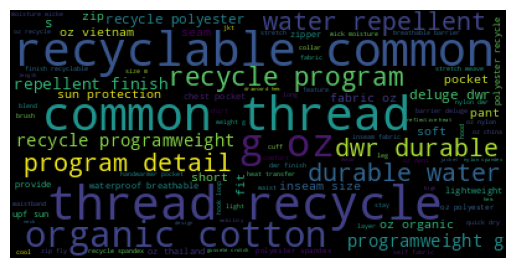

--------------------------------
TOPIC  topic_1  :
----


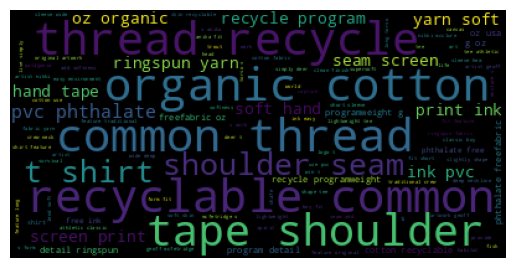

--------------------------------
TOPIC  topic_6  :
----


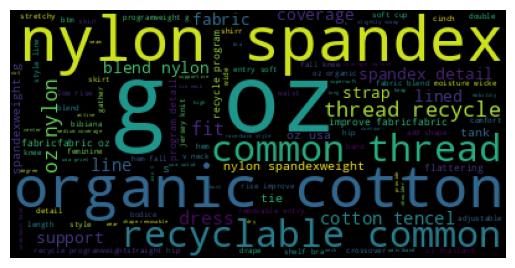

--------------------------------
TOPIC  topic_2  :
----


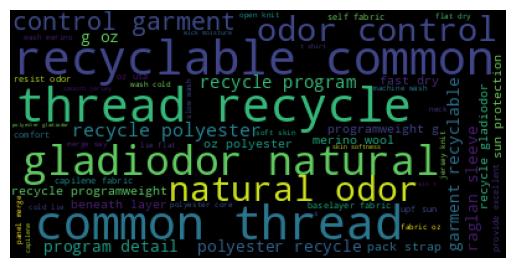

--------------------------------
TOPIC  topic_7  :
----


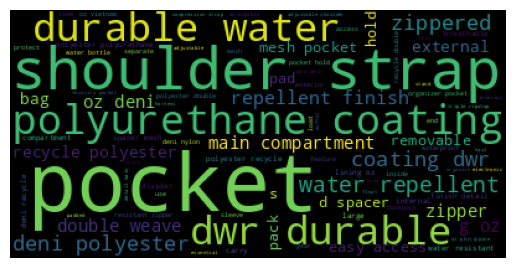

--------------------------------


In [85]:
# Wordcloud for the 5 first topics
wd = wordcloud.WordCloud()

# Loop over the 5 most frequent topics
for topic in (
    topic_encoded_df['main_topic']
    .value_counts()               # Count the number of document in each topic
    .index[:5]                    # Select the index of the 5 most frequent topics
  ) :

  # Show the topic
  print("TOPIC ", topic, " :")
  print("----")

  # Gather all texts in the current topic into a single string
  # Each document is separated by a space so that WordCloud can process the words
  texts = " ".join(topic_encoded_df.loc[topic_encoded_df['main_topic'] == topic, 'nlp_ready'])

  # Generate the word cloud from texts in topic
  cloud = wd.generate(texts)

  # Show the word cloud
  plt.imshow(cloud)
  plt.axis('off')
  plt.show()
  print("--------------------------------")